# Steps for Building a Fake News Detection Model Using Machine Learning:
1. Data Loading and Preparation

2. Data Preprocessing

3. Vectorization
Use TF-IDF (Term Frequency-Inverse Document Frequency)

4. Model Training

5. Model Evaluation
6. Hyperparameter Tuning


# Data Loading and Preparation

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import re
import nltk
import warnings
warnings.filterwarnings('ignore')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report

# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

# Download Stopwords
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
import pandas as pd
import numpy as np

real_news = pd.read_csv('/content/drive/MyDrive/news_detector_model/True.csv')
fake_news = pd.read_csv('/content/drive/MyDrive/news_detector_model/Fake.csv')

real_news['label'] = 0
fake_news['label'] = 1

data = pd.concat([real_news, fake_news], ignore_index=True)

print(data.head())

                                               title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  label  
0  December 31, 2017       0  
1  December 29, 2017       0  
2  December 31, 2017       0  
3  December 30, 2017       0  
4  December 29, 2017       0  


In [3]:
data.tail()

,title,text,subject,date,label
44893,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",1
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",1
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",1
44896,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",1
44897,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",1


In [4]:
news = data.drop(['title','subject','date'], axis=1)
news.head()

,text,label
0,WASHINGTON (Reuters) - The head of a conservat...,0
1,WASHINGTON (Reuters) - Transgender people will...,0
2,WASHINGTON (Reuters) - The special counsel inv...,0
3,WASHINGTON (Reuters) - Trump campaign adviser ...,0
4,SEATTLE/WASHINGTON (Reuters) - President Donal...,0


In [5]:
news = news.sample(frac=1)
news.head()

,text,label
33941,https://twitter.com/TEN_GOP/status/79389017105...,1
24603,It s been two months since the 2016 Election t...,1
32806,HERE S WHAT MCCAIN SAID THAT GOT RAND PAUL ALL...,1
25933,"While Charlotte, North Carolina faces a state ...",1
4054,WASHINGTON (Reuters) - U.S. lawmakers said hig...,0


In [6]:
news=news.reset_index(drop=True)
news.head()

,text,label
0,https://twitter.com/TEN_GOP/status/79389017105...,1
1,It s been two months since the 2016 Election t...,1
2,HERE S WHAT MCCAIN SAID THAT GOT RAND PAUL ALL...,1
3,"While Charlotte, North Carolina faces a state ...",1
4,WASHINGTON (Reuters) - U.S. lawmakers said hig...,0


# Data Preprocessing

In [7]:
import re

def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()

    text = re.sub(r'http\S+|www\.\S+', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = re.sub(r'[^\w\s]', ' ', text)
    text = re.sub(r'<.*?>','', text)
    text = re.sub(r'\d', '', text)
    text = re.sub(r'\n', ' ', text)
    return text

news['text'] = news['text'].apply(preprocess_text)
news['text']

,text
0,is a screen shot of the letter in a tweet fr...
1,it s been two months since the election took ...
2,here s what mccain said that got rand paul all...
3,while charlotte north carolina faces a state o...
4,washington reuters us lawmakers said highprof...
...,...
44893,a protester threw water on geraldo and he imme...
44894,seoul reuters north korea s goal is reaching ...
44895,washington reuters the top democrat on the us...
44896,buenos aires reuters no sign of the argentine...


In [8]:
from tkinter.constants import X
x = news['text']
y = news['label']
x


,text
0,is a screen shot of the letter in a tweet fr...
1,it s been two months since the election took ...
2,here s what mccain said that got rand paul all...
3,while charlotte north carolina faces a state o...
4,washington reuters us lawmakers said highprof...
...,...
44893,a protester threw water on geraldo and he imme...
44894,seoul reuters north korea s goal is reaching ...
44895,washington reuters the top democrat on the us...
44896,buenos aires reuters no sign of the argentine...


In [9]:
y

,label
0,1
1,1
2,1
3,1
4,0
...,...
44893,1
44894,0
44895,0
44896,0


# Train Test Split


In [10]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((35918,), (8980,), (35918,), (8980,))

# Vectorization: Use TF-IDF (Term Frequency-Inverse Document Frequency)

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)
xv_train, xv_test

(<35918x187282 sparse matrix of type '<class 'numpy.float64'>'
 	with 7381337 stored elements in Compressed Sparse Row format>,
 <8980x187282 sparse matrix of type '<class 'numpy.float64'>'
 	with 1814931 stored elements in Compressed Sparse Row format>)

In [12]:
print(xv_train,xv_test)

  (0, 179349)	0.06159649640346231
  (0, 139450)	0.04571257118363991
  (0, 128433)	0.08874655013462271
  (0, 45519)	0.05002027296038158
  (0, 170119)	0.04581657510138135
  (0, 78847)	0.15116727507947877
  (0, 167416)	0.16693606947462186
  (0, 108842)	0.15313825641207354
  (0, 59217)	0.06503526516760905
  (0, 172821)	0.10576207357819141
  (0, 155179)	0.17736310553013448
  (0, 140025)	0.12610951190296088
  (0, 65666)	0.7137906395820796
  (0, 14797)	0.07393235941384246
  (0, 175055)	0.13490717173551597
  (0, 6199)	0.11565243105901415
  (0, 62845)	0.23007030957879276
  (0, 164166)	0.10883734919671675
  (0, 181739)	0.06447669071965559
  (0, 73632)	0.060422844516074534
  (0, 143347)	0.03490232187762901
  (0, 112960)	0.028825769594885326
  (0, 60409)	0.07660852818980615
  (0, 148377)	0.11304984472738282
  (0, 10362)	0.07089051250353046
  :	:
  (35917, 177554)	0.1873064378828181
  (35917, 156923)	0.09104044617298145
  (35917, 53561)	0.06490097379092476
  (35917, 179146)	0.1755425858282627
  (35

# Train a machine Learning model

In [21]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(xv_train, y_train)

y_pred = LR.predict(xv_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9899777282850779
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      4269
           1       0.99      0.99      0.99      4711

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



In [22]:
from sklearn.naive_bayes import MultinomialNB

NB = MultinomialNB()
NB.fit(xv_train, y_train)

y_pred = NB.predict(xv_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9447661469933185
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.95      0.94      4269
           1       0.95      0.94      0.95      4711

    accuracy                           0.94      8980
   macro avg       0.94      0.94      0.94      8980
weighted avg       0.94      0.94      0.94      8980



In [23]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

RFC = RandomForestClassifier(n_estimators=100)
RFC.fit(xv_train, y_train)

y_pred = RFC.predict(xv_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9884187082405346
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      4269
           1       0.99      0.99      0.99      4711

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



In [27]:
GBC = GradientBoostingClassifier()
GBC.fit(xv_train, y_train)

y_pred = GBC.predict(xv_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9948775055679288
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      4269
           1       1.00      0.99      1.00      4711

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



In [24]:
from sklearn.tree import DecisionTreeClassifier

DTC = DecisionTreeClassifier()
DTC.fit(xv_train, y_train)

y_pred = DTC.predict(xv_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9952115812917595
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      4269
           1       1.00      0.99      1.00      4711

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



In [25]:
from sklearn.neighbors import KNeighborsClassifier

KNC = KNeighborsClassifier(n_neighbors=5)
KNC.fit(xv_train, y_train)

y_pred = KNC.predict(xv_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.6844097995545657
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.35      0.52      4269
           1       0.63      0.98      0.77      4711

    accuracy                           0.68      8980
   macro avg       0.79      0.67      0.64      8980
weighted avg       0.78      0.68      0.65      8980



In [26]:
from xgboost import XGBClassifier

XGBC = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
XGBC.fit(xv_train, y_train)

y_pred = XGBC.predict(xv_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9966592427616926
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4269
           1       1.00      1.00      1.00      4711

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



In [30]:
models = {
    "Logistic Regression": LR,
    "Naive Bayes": NB,
    "Random Forest": RFC,
    "Decision Tree": DTC,
    "K-Nearest Neighbors": KNC,
    "Gradient Boosting": GBC,
    "XGBoost": XGBC
}
results = {}
for model_name, model in models.items():
    y_pred = model.predict(xv_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[model_name] = accuracy

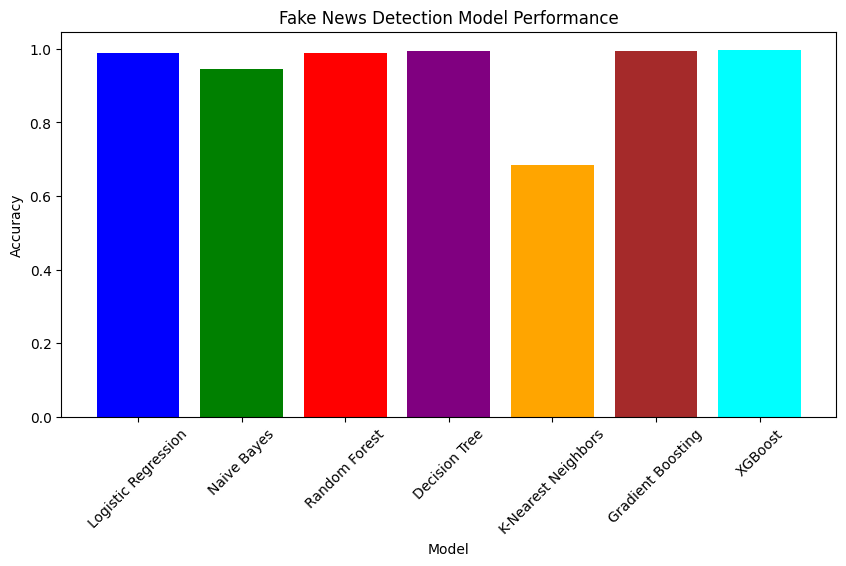

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.bar(results.keys(), results.values(), color=['blue', 'green', 'red', 'purple', 'orange', 'brown', 'cyan'])
plt.xticks(rotation=45)
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Fake News Detection Model Performance")
plt.show()

# Test Model using Manual News

In [34]:
def Output_lable(n):
  if n == 1:
    return "Fake News"
  elif n == 0:
    return "Not A Fake News"

In [38]:
def manual_testing(news):
  testing_news = {"text":[news]}
  new_def_test = pd.DataFrame(testing_news)
  new_def_test["text"] = new_def_test["text"].apply(preprocess_text)
  new_x_test = new_def_test["text"]
  new_xv_test = vectorization.transform(new_x_test)
  pred_LR = LR.predict(new_xv_test)
  pred_NB = NB.predict(new_xv_test)
  pred_RFC = RFC.predict(new_xv_test)
  pred_DTC = DTC.predict(new_xv_test)
  pred_KNC = KNC.predict(new_xv_test)
  pred_GBC = GBC.predict(new_xv_test)
  pred_XGBC = XGBC.predict(new_xv_test)

  return print("\n\LR Prediction: {} \nNB Prediction: {} \nRFC Prediction: {} \nDTC Prediction: {} \nKNC Prediction: {} \nGBC Prediction: {} \nXGBC Prediction: {}".format(Output_lable(pred_LR[0]), Output_lable(pred_NB[0]), Output_lable(pred_RFC[0]), Output_lable(pred_DTC[0]), Output_lable(pred_KNC[0]), Output_lable(pred_GBC[0]), Output_lable(pred_XGBC[0])))

In [45]:
tempnews = """WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also want proportional increases for non-defense “discretionary” spending on programs that support education, scientific research, infrastructure, public health and environmental protection. “The (Trump) administration has already been willing to say: ‘We’re going to increase non-defense discretionary spending ... by about 7 percent,’” Meadows, chairman of the small but influential House Freedom Caucus, said on the program. “Now, Democrats are saying that’s not enough, we need to give the government a pay raise of 10 to 11 percent. For a fiscal conservative, I don’t see where the rationale is. ... Eventually you run out of other people’s money,” he said. Meadows was among Republicans who voted in late December for their party’s debt-financed tax overhaul, which is expected to balloon the federal budget deficit and add about $1.5 trillion over 10 years to the $20 trillion national debt. “It’s interesting to hear Mark talk about fiscal responsibility,” Democratic U.S. Representative Joseph Crowley said on CBS. Crowley said the Republican tax bill would require the United States to borrow $1.5 trillion, to be paid off by future generations, to finance tax cuts for corporations and the rich. “This is one of the least ... fiscally responsible bills we’ve ever seen passed in the history of the House of Representatives. I think we’re going to be paying for this for many, many years to come,” Crowley said. Republicans insist the tax package, the biggest U.S. tax overhaul in more than 30 years, will boost the economy and job growth. House Speaker Paul Ryan, who also supported the tax bill, recently went further than Meadows, making clear in a radio interview that welfare or “entitlement reform,” as the party often calls it, would be a top Republican priority in 2018. In Republican parlance, “entitlement” programs mean food stamps, housing assistance, Medicare and Medicaid health insurance for the elderly, poor and disabled, as well as other programs created by Washington to assist the needy. Democrats seized on Ryan’s early December remarks, saying they showed Republicans would try to pay for their tax overhaul by seeking spending cuts for social programs. But the goals of House Republicans may have to take a back seat to the Senate, where the votes of some Democrats will be needed to approve a budget and prevent a government shutdown. Democrats will use their leverage in the Senate, which Republicans narrowly control, to defend both discretionary non-defense programs and social spending, while tackling the issue of the “Dreamers,” people brought illegally to the country as children. Trump in September put a March 2018 expiration date on the Deferred Action for Childhood Arrivals, or DACA, program, which protects the young immigrants from deportation and provides them with work permits. The president has said in recent Twitter messages he wants funding for his proposed Mexican border wall and other immigration law changes in exchange for agreeing to help the Dreamers. Representative Debbie Dingell told CBS she did not favor linking that issue to other policy objectives, such as wall funding. “We need to do DACA clean,” she said. On Wednesday, Trump aides will meet with congressional leaders to discuss those issues. That will be followed by a weekend of strategy sessions for Trump and Republican leaders on Jan. 6 and 7, the White House said. Trump was also scheduled to meet on Sunday with Florida Republican Governor Rick Scott, who wants more emergency aid. The House has passed an $81 billion aid package after hurricanes in Florida, Texas and Puerto Rico, and wildfires in California. The package far exceeded the $44 billion requested by the Trump administration. The Senate has not yet voted on the aid."""
tempnews2 = """In the wake of yet another court decision that derailed Donald Trump s plan to bar Muslims from entering the United States, the New York Times published a report on Saturday morning detailing the president s frustration at not getting his way and how far back that frustration goes.According to the article, back in June, Trump stomped into the Oval Office, furious about the state of the travel ban, which he thought would be implemented and fully in place by then. Instead, he fumed, visas had already been issued to immigrants at such a rate that his friends were calling to say he looked like a fool after making his broad pronouncements.It was then that Trump began reading from a document that a top advisor, noted white supremacist Stephen Miller, had handed him just before the meeting with his Cabinet. The page listed how many visas had been issued this year, and included 2,500 from Afghanistan (a country not on the travel ban), 15,000 from Haiti (also not included), and 40,000 from Nigeria (sensing a pattern yet?), and Trump expressed his dismay at each.According to witnesses in the room who spoke to the Times on condition of anonymity, and who were interviewed along with three dozen others for the article, Trump called out each country for its faults as he read: Afghanistan was a terrorist haven, the people of Nigeria would never go back to their huts once they saw the glory of America, and immigrants from Haiti all have AIDS. Despite the extensive research done by the newspaper, the White House of course denies that any such language was used.But given Trump s racist history and his advisor Stephen Miller s blatant white nationalism, it would be no surprise if a Freedom of Information Act request turned up that the document in question had the statements printed inline as commentary for the president to punctuate his anger with. It was Miller, after all, who was responsible for the American Carnage speech that Trump delivered at his inauguration.This racist is a menace to America, and he doesn t represent anything that this country stands for. Let s hope that more indictments from Robert Mueller are on their way as we speak.Featured image via Chris Kleponis/Pool/Getty Images"""

In [46]:
manual_testing(tempnews)


\LR Prediction: Not A Fake News 
NB Prediction: Not A Fake News 
RFC Prediction: Not A Fake News 
DTC Prediction: Not A Fake News 
KNC Prediction: Not A Fake News 
GBC Prediction: Not A Fake News 
XGBC Prediction: Not A Fake News


In [47]:
manual_testing(tempnews2)


\LR Prediction: Fake News 
NB Prediction: Fake News 
RFC Prediction: Fake News 
DTC Prediction: Fake News 
KNC Prediction: Fake News 
GBC Prediction: Fake News 
XGBC Prediction: Fake News


# Save and Load Model

In [56]:
import joblib

# Assuming you have already fitted the TF-IDF vectorizer
joblib.dump(vectorization, "vectorizer.pkl")

print("Vectorizer saved successfully!")

Vectorizer saved successfully!


In [57]:
# Load the saved vectorizer
vectorizer = joblib.load("vectorizer.pkl")

print("Vectorizer loaded successfully!")

Vectorizer loaded successfully!


In [48]:
import joblib

# Save the trained model
joblib.dump(model, "fake_news_detector.pkl")

print("Model saved successfully!")

Model saved successfully!


In [50]:
# Load the model
loaded_model = joblib.load("fake_news_detector.pkl")

print("Model loaded successfully!")

Model loaded successfully!


In [55]:
# Example new input text
new_text = ["AI system detects early signs of cancer"]

# Convert text to features (use the same vectorizer used during training)
new_text_tfidf = vectorization.transform(new_text).toarray()

# Predict using the loaded model
prediction = loaded_model.predict(new_text_tfidf)

# Check result
print("Fake News" if prediction[0] == 1 else "Real News")

Fake News
